<a href="https://colab.research.google.com/github/natasablagojevic/ip1/blob/main/Mere_sli%C4%8Dnosti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bliskost-sličnost i različitost

1. **Sličnost**
 * Numerička mera koliko su dva objekta slična
 * Što dva objekta više liče jedan na drugi sličnost im je veca
 * Često se meri vrednostima u intervalu [0, 1]
  
  Kada koristimo?:
  - Pronalazak grešaka u podacima (nastalih npr. greškom u kucanju)
  - Pronalazak grupa koje su jako slične (klasteri)

2. **Različitost**
 * Numerička mera koliko su dva objekta različita
 * Što dva objekta više liče jedan na drugi različitost im je manja
 * Najmanja različitost je često 0; gornja granica varira
 * Kao sinonim koristi se i termin rastojanje
 
 Kada koristimo?
  - outlajere
  - izuzetke
  - granice klastera

3. **Blizina** (eng. proximity) označava ili sličnost ili različitost

In [ ]:
from matplotlib import pyplot as plt

### Mera sličnosti za nominalne atribute

$s(p, q) = \left\{ 
  \begin{array}{ c l }
    1 & \quad \textrm{ako } p = q \\
    0                 & \quad \textrm{inače}
  \end{array}
\right.$

In [ ]:
def similarity_nominal(p, q): 
    # CODE HERE
    return int(p == q)

In [ ]:
similarity_nominal("Petar", "Jovan") # izlaz: 0

0

In [ ]:
similarity_nominal("Petar", "Petar") # izlaz: 1

## Mera različitosti za nominalne atribute

$d(p, q) = \left\{ 
  \begin{array}{ c l }
    0 & \quad \textrm{ako } p = q \\
    1                 & \quad \textrm{inače}
  \end{array}
\right.$

In [ ]:
def dissimilarity_nominal(p, q):
  return int(p != q)
  # CODE HERE

In [ ]:
dissimilarity_nominal("Petar", "Jovan") # izlaz: 1

1

In [ ]:
dissimilarity_nominal("Petar", "Petar") # izlaz: 0

0

## Mera različitosti za ordinalne atribute

$
d(p, q) = \frac{|p'-q'|}{n-1}
$

Vrednost p i q slikaju u cele brojeve od 0 do n - 1, gde je n broj mogućih vrednosti 


In [ ]:
import pandas as pd

def dissimilarity_ordinal(p, q, values):
    # CODE HERE
    n = len(values)
    v = pd.Series(range(n), values)



    return  (abs(v[p] - v[q])/(n-1))

In [ ]:
dissimilarity_ordinal("M", "XL", ["S", "M", "L", "XL"])  # izlaz: 0.6666666666666666

0.6666666666666666

In [ ]:
dissimilarity_ordinal("S", "XL", ["S", "M", "L", "XL"])  # izlaz: 1.0

1.0

## Mera sličnosti za ordinalne atribute

$
s(p, q) = 1 - d(p, q)
$

In [ ]:
import pandas as pd

def similarity_ordinal(p, q, values):
    # CODE HERE
    return 1 - dissimilarity_ordinal(p, q, values)

In [ ]:
similarity_ordinal("M", "XL", ["S", "M", "L", "XL"])  # izlaz: 0.33333333333333337

0.33333333333333337

In [ ]:
similarity_ordinal("S", "XL", ["S", "M", "L", "XL"])  # izlaz: 0.0

0.0

## Mere različitosti za kvantitativne atribute

$d(p, q) = |p-q| $

In [ ]:
def dissimilarity_quantity(p, q):
    # CODE HERE
    return abs(p-q)

In [ ]:
import datetime
dissimilarity_quantity(datetime.date(2020, 3, 25), datetime.date(2020, 7, 24))

datetime.timedelta(days=121)

## Mere sličnosti - opcija 1

$s(p, q) = -d(p, q)$

In [ ]:
def similarity_quantity_1(p, q):
    # CODE HERE
    return -dissimilarity_quantity(p, q)

In [ ]:
similarity_quantity_1(datetime.date(2020, 3, 25), datetime.date(2020, 7, 24))

datetime.timedelta(days=-121)

## Mere sličnosti - opcija 2

$s(p, q) = \frac{1}{1+d}$

In [ ]:
def similarity_quantity_2(p, q):
    # CODE HERE ???
    return 1/int(1 + abs(p - q))

In [ ]:
similarity_quantity_2(datetime.date(2020, 3, 25), datetime.date(2020, 7, 24)) # 0.00819672131147541

TypeError: ignored

# Različitosti između objekata podataka

ime: PETAR, MILAN, JOVAN

PETAR: 1/0
MILAN: 1/0
JOVAN: 1/0


### Rastojanje Minkovskog:
$ mink(x, y) = (\sum_{k=1}^{n}|x_k-y_k|^r)^\frac{1}{r}$

 - r parametar
 - n broj dimenzija (atributa)
 - $x_k$ i $y_k$ su vrednosti k-tog atributa objekata x i y


Rastojanje Minkovskog

* **r = 1** Menhetn (L1 norma) rastojanje
    Hamingovo rastojanje
* **r = 2** Euklidsko rastojanje

* **r → ∞**  supremum (Lmax norma) rastojanje

> Predstavlja maksimum razlike između odgovarajucih komponenti vektora




In [ ]:
def minkowski(x, y, r):
  if r <= 0:
    raise ValueError
  return (sum([abs(x[v] - y[v])**r for v in x.index])**(1/r))  

#### Zadatak 1:
Posmatramo naredni skup tačaka:

|point |x  | y|
--- | --- | ---|
|**p1**|0|2|
|**p2**|2|0|
|**p3**|3|1|
|**p4**|5|1|

Izračunati $L_1$, $L_2$, $L_{max}$ normu:

In [ ]:
points = pd.DataFrame([[0,2], [2, 0], [3, 1], [5, 1]], index=["p1", "p2", "p3", "p4"], columns=["x", "y"])
points

,x,y
p1,0,2
p2,2,0
p3,3,1
p4,5,1


Text(0.5, 1.0, 'Points')

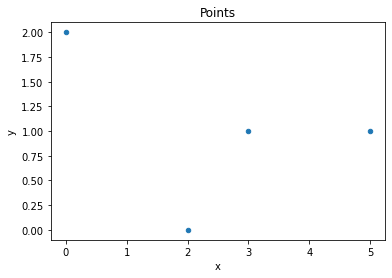

In [ ]:
points.plot.scatter("x", "y")
plt.title("Points")


a) Izračunati L1 normu: 

Očekivan izlaz:

|$L_1$|p1| p2|p3|p4|
--- | --- | ---| ---|---|
|**p1**|0|4|4|6|
|**p2**|4|0|2|4|
|**p3**|4|2|0|2|
|**p4**|6|4|2|0|

In [ ]:
def L1(points):
    # CODE HERE 

    l = pd.DataFrame(0, index=points.index, columns=points.index)    

    sum = 0
    for i in l:
      for j in i:
        l

    return l
 L1(points)

a) Izračunati L2 normu: 

Očekivan izlaz:

|$L_2$|p1| p2|p3|p4|
--- | --- | ---| ---|---|
|**p1**|0.0|2.828|3.162|5.099|
|**p2**|2.828|0.0|1.414|3.162|
|**p3**|3.162|1.414|0.0|2.0|
|**p4**|5.099|3.162|2.0|0.0|

In [ ]:
def L2(points):
    # CODE HERE
    pass
L2(points)

a) Izračunati Lmax normu: 

Očekivan izlaz:

|$L_max$|p1| p2|p3|p4|
--- | --- | ---| ---|---|
|**p1**|0|2|3|5|
|**p2**|2|0|1|3|
|**p3**|3|1|0|2|
|**p4**|5|3|2|0|

In [ ]:
def Lmax(points):
  # CODE HERE
  pass
Lmax(points)

## Normalizacija

In [ ]:
def normalization(x):
    # CODE HERE
    pass

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
x = pd.DataFrame([[1, 200, 3], [200, 40, 200]])
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0., 1., 0.],
       [1., 0., 1.]])

## Standardizacija
https://escholarship.org/content/qt89k2w1km/qt89k2w1km.pdf